# Gilfoyle's Bitcoin Warning Rig

- Author: Si-ja
- Date:   2019-05-15
- GitHub: https://github.com/Si-ja

So the reason this exists is because of this: https://www.youtube.com/watch?v=uS1KcjkWdoU

So Gilfoyle from the series Silicon Valley has a rig, that plays a song by Napalm Death - You Suffer everytime the Bitcoin drops to a certain level or lower. This is the full song: https://www.youtube.com/watch?v=ybGOT4d2Hs8

So let's build it in python. Because literally why not. I actually had a lot of fun doing it. Coming up with a way to do it from scratch took me about one day, but I'm not proficient in this and am learning as well with you. The set up actually will be located in a different file this time and the code will be executed slightly differently (more on that later). This notebook is dedicated to explaining the functions that are used to build a full executable function that can run in the background, checking for Bitcoin prices and kindly informing us with ear bleading sound when it drops to a level we do not desire to see it there.

Let's get started!

First function that we will need is something to play the sound.
The following components are used:
- importing of the **winsound** package
- initiating playing of a specific file

Our track is saved in the same file as our python (.ipynb file). We do not need to indicate the extension in the file, but for this case I am using a .wav one. Not to get into any legal trouble, in my project I am actually using a cover version of the mentioned song: https://www.youtube.com/watch?v=AJ4hFe_IFLk Thanks Opeth! ...yes, there is a cover...deal with it

In [1]:
def ear_pain():
    """Initiate the melody when called."""
    import winsound
    winsound.PlaySound("SUFFER", winsound.SND_FILENAME)
ear_pain()

Next we will need some kind of a function that checks the Bitcoin prices online. Luckely - coindesk has a very convenient api that we can work with. It updates every minute, therefore we know we will not be putting any strain on the website if we will make our code request information only every minute - yes, this is something you should consider, as data scraping is a tricky thing sometimes from the legal perspective.

To work with coindsek we will need a package: **requests**. Information that we will request is located in a convenient .json file, which we only need to preprocess a bit and receive our value of the bitcoin at the moment of the request. 

In addition you can get more information if you so chose to, including information for the USD, EUR and GBP currencies. Check more of what you can retrieve by going to: https://www.coindesk.com/api They have a very short and a very convenient documentation.

**Side note:** while working on this project I noticed that sometimes retrieved values of the Bitcoin and the ones on the website do not match. Haven't really figured out the reason, but just word of caution if you will use this method for something more serious - check whether you receive accurate information yourselves.

In [2]:
def bitcoin(currency = "USD"):
    """Retrieve data from coindesk api when called. Can work on USD, EUR & GBP. By default is set to USD."""
    import requests
    currency = currency
    url = "https://api.coindesk.com/v1/bpi/currentprice.json"
    response = requests.get(url)
    #This is the part where we enter the retrieved information in a .json format and process it.
    #In reality it operates in a similar manner as a dictionary.
    #We go by levels further and further to what we need
    #bpi -> type of a currency -> what we need for it
    
    #You can know the path by looking and learning a bit the documentation for what you retrieve, it's not standard
    #for every single case you deal with
    value = response.json()["bpi"][currency]["rate_float"]
    return value 

bitcoin()

6010.2017

To be honest - just these 2 functions are enough to be done with all of it. Just run them in a loop as much as you want for how long you wish, and tell python to play the sound when the value drops...But let's go few steps further.

Let's create a log file, to track information when our values droped. This log file will also be used to creae a graph that will visualize when the currency was droping or how it looked alltogether.

To keep a log for every instance we run this python script - we need a function that would clear the old log and start fresh. This is quite simple:

In [ ]:
def clean_log():
    """This will initiate cleaning of the log file for tracking of the information from current time. Done only 1. per session."""
    open('Bitcoin_log.txt', 'w').close()

Now we need something to populate the log. Every instance since the moment we start our code will loged into our file with two values - the number of the instance loged and the value of the bitcoin at that moment. It will make it really convenient to build a graph in the end.

In [ ]:
def log_builder(data_money, instance):
    """Function that writes indicated data into a file by appending it.
    data_money - information about the current value of the bitcoin.
    instance - instance of the bitcoin tracked."""
    array_to_text = str(instance) + "," + str(data_money) + "\n"
    outF = open("Bitcoin_log.txt", "a")
    outF.writelines(array_to_text)
    outF.close()

After all of this we can build a graph/plot. Now this is a bit of a long function, and it is taken from one of the videos addressed by sentdex: https://youtu.be/ZmYPzESC5YY so I strongly encourage to take his video for the example. 

Now two things to notice - our plot will not be animated or run in the background. The plot will however be used and created for every single instance and saved afterwards. Now the reason it's done every minute with the given function is that, if we have set for example our code to run for an hour, and we turn of our pc earlier than that forgeting about it running - so we wouldn't lose all of our progress and the plot would remain.
Second thing: we need few packages to work with, and i'm really organized and completelly forgot what we must and must not use at this point, so my advice: import all the packages if you do not know what they do, or if you know - figure out what is extra. There is no conflict as I've notcied between them and there is only few, so importing more than needed won't be a problem.

But for this instance you will definitelly need in general **matplotlib**, **numpy**, **scipy**.
What I mentioned might be extra is the calling of the function *import matplotlib.animation as animation*. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import numpy as np
from scipy.interpolate import spline
import time
import warnings
from IPython.display import clear_output

def animate():
    style.use("dark_background")
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    dipping_pont = treshold

    graph_data = open("Bitcoin_log.txt", "r").read()
    lines = graph_data.split("\n")
    xs = []
    ys = []
    dipper = []

    itterator = len(lines) * 10
    for line in lines:
        if len(line) > 1:
            x, y = line.split(",")
            xs.append(float(x))
            ys.append(float(y))
            dipper.append(float(dipping_pont))
    xs = np.array(xs)
    ys = np.array(ys)   

    x_smoth = np.linspace(xs.min(), xs.max(), itterator)
    dipper = np.linspace(dipping_pont, dipping_pont, itterator)
    y_smoth = spline(xs, ys, x_smoth)

    ax1.clear()   
    ax1.plot(xs, ys, "o")
    ax1.plot(x_smoth, y_smoth, 'c')
    ax1.axhline(y=dipping_pont,  color='r', linestyle='-')
    ax1.fill_between(x_smoth, y_smoth, dipping_pont, where = (y_smoth > dipper), color = "g", alpha = 0.6)
    ax1.fill_between(x_smoth, y_smoth, dipping_pont, where = (y_smoth < dipper), color = "r", alpha = 0.6)
    ax1.set_title("Rate of Bitcoin in " + str(currency))
    ax1.set_ylabel("Price")
    ax1.set_xlabel('Instance')

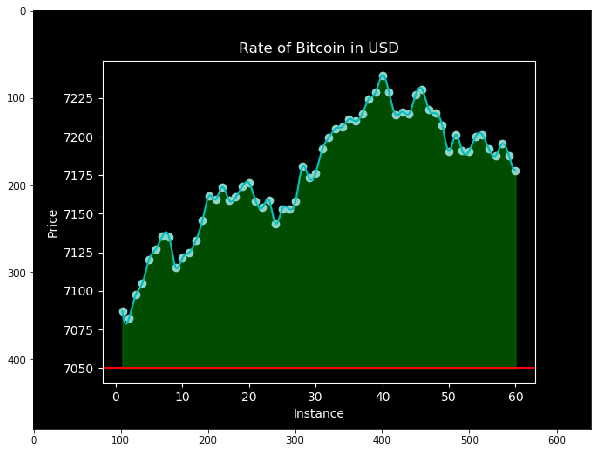

In [18]:
#Now this is an example of a log file that you will have in your directory after the program finishes
#For this instance the software was ran for 1 hour, the bitcoin was fluctuating higher than the treshold indicated
#of 7050 USD. Every single point on the curve indicate what value of the bitcoin was at a certain minute.
import matplotlib.pyplot as plt
img = plt.imread('LogExample.png')
fig, ax = plt.subplots(figsize=(10, 16))
ax.imshow(img, interpolation='nearest')

By this point technically we are ready to put everything together. We will run the file, that will initially clean our log, and then will be retrieving info from online on the volatility of a Bitcoin and if it will dip we will ask for python to play the appropriate sound and as we go the log is turned into a graph/plot.

However, it will not be done in the .ipynb notebook, but in a .py file. The reason: I felt like it. But the bigger one: I wanted something small that can run in the background. It's all good when we need to do some processes and the jupyter notebook environment is really convenient for that, but it's much better to have a small python file running in the backgroun on your machine in the first place.

How it's done: (and this is mostly for windows, but on Linux and Mac you can just run the file through a text editor for python...I'm not too familiar with OS and Unix systems to make it universal, even for such small project :/// )

- I inserted the code into the **BitCoin.py** file. It has extra features.
    - It reads settings for it from the **Settings.txt** file. There we can indicate what currency we want to work, with which tresholds under which we do not want the Bitcoin to dip and for how long (in minutes).
    - The code itself is a bit longer than having said functions but only things added: it runs in an itterative pattern. Meaning in a loop, that's something we did not have in our functions previously.
    - It can be executed running a **Execute_BitCoin.bat** file. So we do not have to constantly go into any text editors to run it or to the cmd promt or the terimanl depending on the system you are using. (more on how it works in a second).
- The python file will be running in the backgroun taking very little resourses, as after one itteration the system is put to sleep for 60 seconds before it runs another loop. It's much more efficient than having Jupyter Notebook opened in the background while using your pc/laptop, or any IDE softs (or even simple text editors like VS Code).

The only condition to run the file without any problem is to have python installed in such a way that when you write the command in your cmd promt **python -V** you would be shown the version of the python you are working with. Sorry Linux users, do not know your situation...or mac :/ If python is installed on your machine, but you get an error, I recomend looking into this file: https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/ or https://www.youtube.com/watch?v=Y2q_b4ugPWk Or any alternative resourses. The issue overal is that your python interpreter (as I understand) is not added to your winodws recognition paths, so it might be installed, but running simply "python" in cmd will yield an error, as windows does not know what you want to do whith this sequence of letters - is it a file you need to run in your current directory, is it a function for something...so you need to specify it.

Now for Execute_BitCoin.bat - you can open it with a notepad and check the information in the file it will not corrupt it. It only has a simple text instruction sequnce:

> @echo off

> python BitCoin.py

> exit

@echo off would just open a blank cmd screen: https://docs.microsoft.com/en-us/windows-server/administration/windows-commands/echo

python BitCoin.py will do 2 things: first it will call python as a file interpreter - hopefully you have set it up properly like in the explanation above. Then it will execute the file BitCoin.py if you also have it in the same directory as the Execute_BitCoin.bat. It will run it. The file is set in such way that you can run it from a text editor like VS Code (or IDE really) or through such a convenient way. It will work in the backgroun and occassionally play music for you if the Bitcoin dips.

exit statement will just close the running cmd window after all the itterations have been ran (basically for how many minutes you have set your program to work). This allows to automate this small part without being forced to do it manually as well, you do not need to keep manual track of when the program actually would stop working and would just otherwise idle in the background.

Now one more reason to use such method. This file has a sleep(60) function. Which makes it inactive for a minute every time the bitcoin values are updated. In a text editor - to stop the function if we noticed any issues - it would take time before the time() function stops running or as an alternative - you can close the software you are using to run the code in the first place, but then you will have to re-open it...with the .bat approach - this is done much faster and we can close and re-open the program instantaniously...also I just wanted to experiment with such an approach...

You can find all the files in the github repostory for this project. Place them in the same fashion they are placed there...so in one single folder. Should work perfectly. And have fun.

**Side note** Some additional comments are left in the .py file for to also explain some thoughts and ideas what the file is running on. I do recomend to check them out and GitHub allows for that to be easily done, so do it.